<a href="https://colab.research.google.com/github/k-Mahendran/CNN-Projects/blob/main/ImageClassification_Using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# checking the shape

# x_train.shape
# x_test.shape
# y_train.shape
# y_test.shape

In [ ]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog','frog','horse','ship','truck']

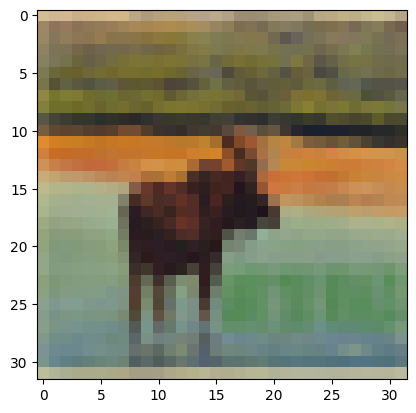

In [ ]:
plt.imshow(x_train[66])

In [ ]:
class_names[y_train[66][0]]

'deer'

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# layers operations

model = models.Sequential()
# Convalutional
model.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
# Pooling
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
# convalutional
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,584 (92.12 KB)

 Trainable params: 23,584 (92.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Neural Nerwork Operations
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,834 (350.91 KB)

 Trainable params: 89,834 (350.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 9)

Epoch 1/9
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.1139 - loss: 3.1545 - val_accuracy: 0.0986 - val_loss: 2.3026
Epoch 2/9
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.1021 - loss: 2.3026 - val_accuracy: 0.0986 - val_loss: 2.3026
Epoch 3/9
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.0999 - loss: 2.3026 - val_accuracy: 0.0986 - val_loss: 2.3026
Epoch 4/9
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.0988 - loss: 2.3026 - val_accuracy: 0.0986 - val_loss: 2.3026
Epoch 5/9
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.0990 - loss: 2.3030 - val_accuracy: 0.0986 - val_loss: 2.3026
Epoch 6/9
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.0992 - loss: 2.3026 - val_accuracy: 0.0986 - val_loss: 2.3026
Epoch 7/9
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.0992 - loss: 2.3026 - val_accuracy: 0.0986 - val_loss: 2.3026
Epoch 8/9
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.0988 - loss: 2

In [ ]:
# prediction

y_predict = model.predict(x_test)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[13.540998 , 10.907524 ,  8.759931 , ..., 14.768695 ,  7.1646852,
        10.102632 ],
       [17.707827 , 15.228897 , 11.768328 , ..., 19.885023 ,  9.380449 ,
        14.023238 ],
       [14.809681 , 12.403553 , 10.218506 , ..., 17.04221  ,  7.777882 ,
        11.692716 ],
       ...,
       [ 9.895741 ,  7.5278506,  7.0303473, ..., 11.065046 ,  5.0237784,
         6.956877 ],
       [15.61981  , 12.3573065, 10.12231  , ..., 16.619585 ,  8.615089 ,
        11.241192 ],
       [11.120953 ,  9.111758 ,  7.966841 , ..., 13.192914 ,  5.4732223,
         8.708479 ]], dtype=float32)

In [ ]:
import numpy as np
y_predict1 = np.argmax(y_predict, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict1,y_test)

0.1001

In [ ]:
y_predict1[5]

np.int64(5)

In [ ]:
y_test[5]

array([6], dtype=uint8)

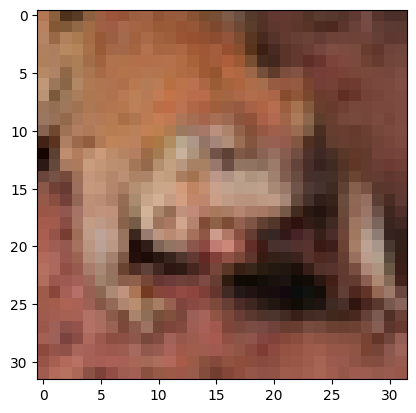

In [ ]:
plt.imshow(x_test[5])